In [76]:
import pandas as pd
import os
import openpyxl


folder_path = 'C:\\Users\\lolak\\Desktop\\dane_pacjentów\\pacjenci'
pacjenci = []

if os.path.isdir(folder_path):
    print("Przeszukiwanie folderu:", folder_path)
    znalezione_pliki = False
    for plik in os.listdir(folder_path):
        if plik.endswith('.xlsx') and not plik.startswith('~$'):
            znalezione_pliki = True
            pacjenci.append(plik)


rows = ['Pole pow. l. przeds.', 'LAESV (A-L BIP)', 'LAESV (MOD BIP)', 
      'LVCO (4D Auto LVQ)', 'LVEF (Teich)', 'LVEF (4D Auto LVQ)',
      'GLPS (4D Auto LVQ)','LVIDd','LVIDs', 'IVSd', 'Masa LVd (4D Auto LVQ)',
      'LVPWd', 'LVSV (Teich)', 'LVSV (4D Auto LVQ)', 'LVCO (MOD BIP)',
      'LVEF (Auto EF BIP)', 'LVSV (Auto EF BIP)', 'LVEDV (Auto EF BIP)',
      'LVESV (Auto EF BIP)', 'RAA (s)', 'TAPSE']

combined_data = pd.DataFrame()

for pacjent in pacjenci:
    file_path = os.path.join(folder_path, pacjent)
    file = pd.read_excel(file_path)
    for value in rows:
        filter = file["Krótka etykieta"] == value
        filtered_data = file[filter]
        filtered_data.insert(0, 'nazwa pacjenta', pacjent)
        selected_columns = ['nazwa pacjenta', 'Krótka etykieta', 'Zapisana wartość']
        filtered_data = filtered_data[selected_columns]
        combined_data = pd.concat([combined_data, filtered_data])

pivot_data = combined_data.pivot_table(index='nazwa pacjenta', columns='Krótka etykieta', values='Zapisana wartość', aggfunc='first')

Przeszukiwanie folderu: C:\Users\lolak\Desktop\dane_pacjentów\pacjenci


In [108]:
output_file = os.path.join(folder_path, 'output', 'wybrane_dane_pacjentów.xlsx')
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    pivot_data.to_excel(writer, index=True, sheet_name='out')

In [109]:
import numpy as np
pd.options.mode.chained_assignment = None
#df = pd.read_excel(output_file)

df = pd.read_excel(output_file)
for index, pacjent in enumerate(pacjenci):
    for row in rows:
        #print(df[row][index])
        df[row][index] = float(str(df[row][index]).split(' ')[0])

C:\Users\lolak\AppData\Local\Temp\ipykernel_1192\2699138782.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[row][index] = float(str(df[row][index]).split(' ')[0])
C:\Users\lolak\AppData\Local\Temp\ipykernel_1192\2699138782.py:9: Futur

In [110]:
def licz_srednia(lista):
    suma = 0
    liczba_el = 0
    for element in lista:
        if element != np.nan:
            suma += element
            liczba_el += 1
    return suma/liczba_el

for value in rows:
    values = df[f'{value}'].dropna().tolist()
    srednia = licz_srednia(values)
    odchylenie = np.std(values)
    print(f'srednia dla {value} wynosi {srednia}, a odchylenie standardowe wynosi {odchylenie}')

srednia dla Pole pow. l. przeds. wynosi 25.1688642581342, a odchylenie standardowe wynosi 6.827042615515194
srednia dla LAESV (A-L BIP) wynosi 92.78757090867518, a odchylenie standardowe wynosi 45.690375456650855
srednia dla LAESV (MOD BIP) wynosi 83.02721694913917, a odchylenie standardowe wynosi 36.02805284414719
srednia dla LVCO (4D Auto LVQ) wynosi 5.899897538387293, a odchylenie standardowe wynosi 1.6620478233526716
srednia dla LVEF (Teich) wynosi 62.26490083046201, a odchylenie standardowe wynosi 10.534506265172878
srednia dla LVEF (4D Auto LVQ) wynosi 54.67159396628466, a odchylenie standardowe wynosi 7.4140465774582704
srednia dla GLPS (4D Auto LVQ) wynosi -14.78723231703043, a odchylenie standardowe wynosi 4.335261502409303
srednia dla LVIDd wynosi 4.859429304715731, a odchylenie standardowe wynosi 0.6159970868944787
srednia dla LVIDs wynosi 3.2170830633272, a odchylenie standardowe wynosi 0.6995219620423389
srednia dla IVSd wynosi 1.1429303546461622, a odchylenie standardowe 

In [13]:
stats_value = ['Średnia', 'Odchylenia standardowe']

[0.02068004224346316, 0.022756766913113076, 0.022574266674828345, 0.03573267895161273, 0.09157713698765406, 0.03601900043535766, nan, 0.03383799243100077, 0.03222021360638142, 0.04011025390393565, nan, 0.07278832695137195, 0.03653849276258625, 0.030058678577469283, 0.05326995398541371, 0.032201980950705145, 0.037456847326654295, 0.04444286542806505, 0.10208557660879776, 0.015546476940658083, 0.030467074010220363]


In [111]:
import matplotlib.pyplot as plt

Exception ignored in: <function ZipFile.__del__ at 0x0000025BCBFE7C40>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\zipfile.py", line 1886, in __del__
    self.close()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\zipfile.py", line 1903, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file
C:\Users\lolak\AppData\Local\Temp\ipykernel_1192\778391139.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


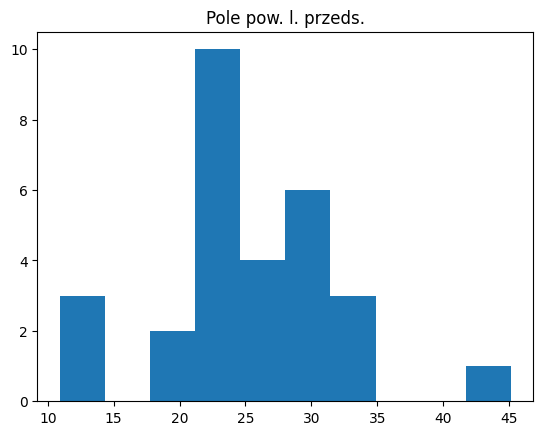

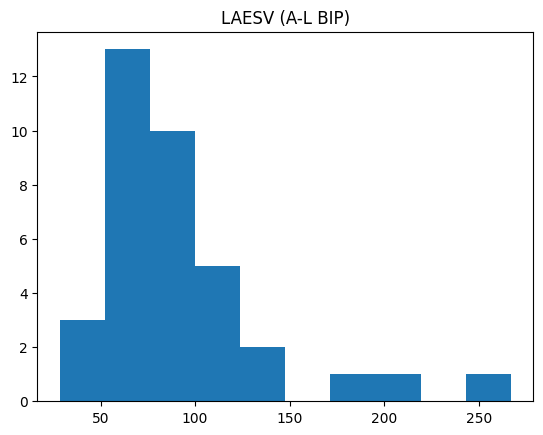

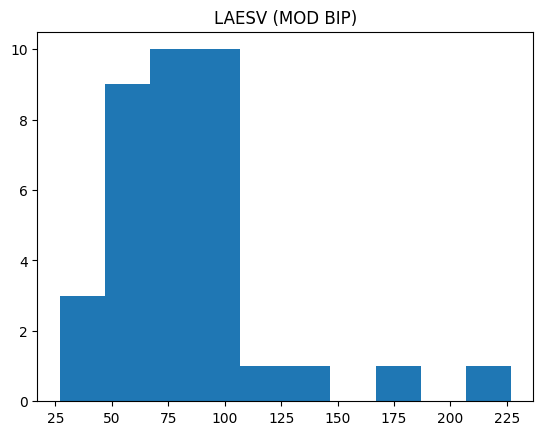

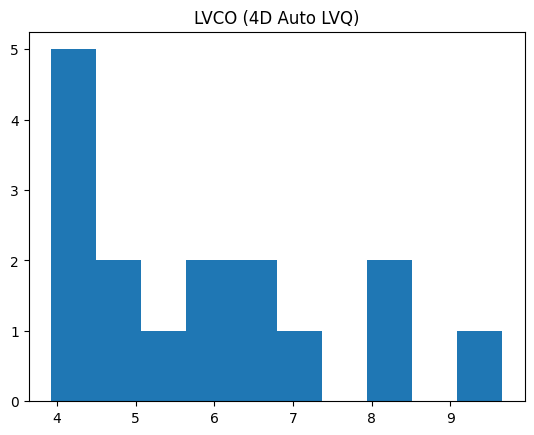

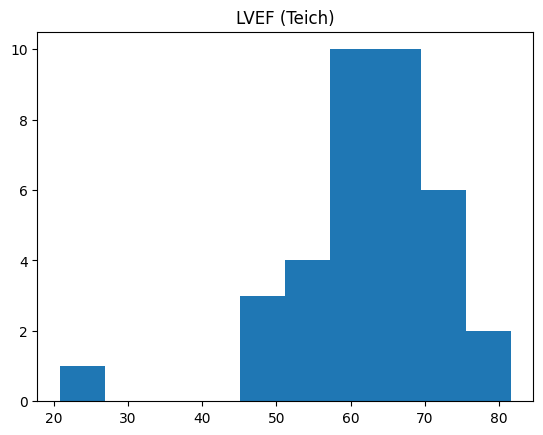

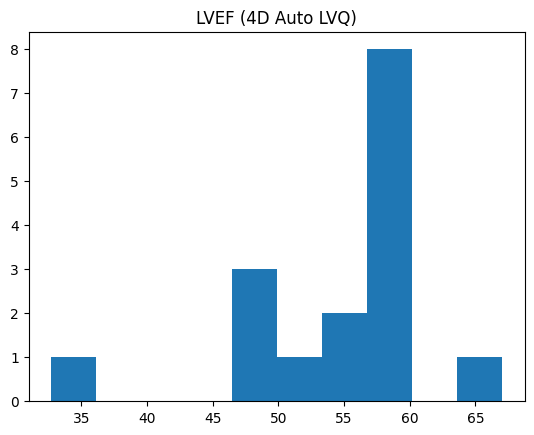

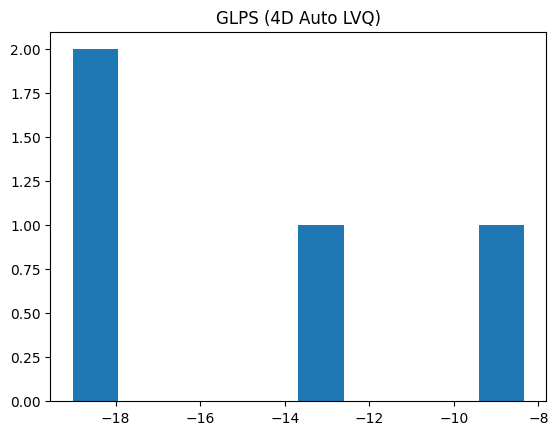

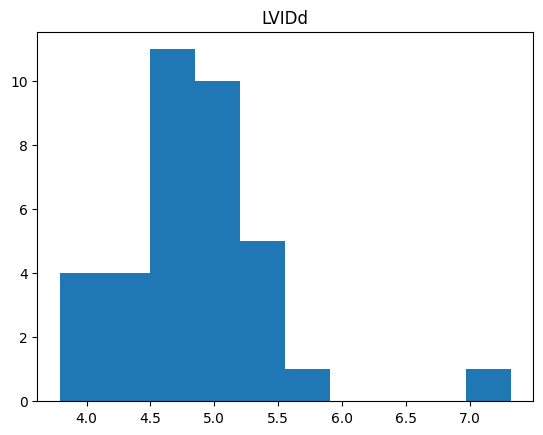

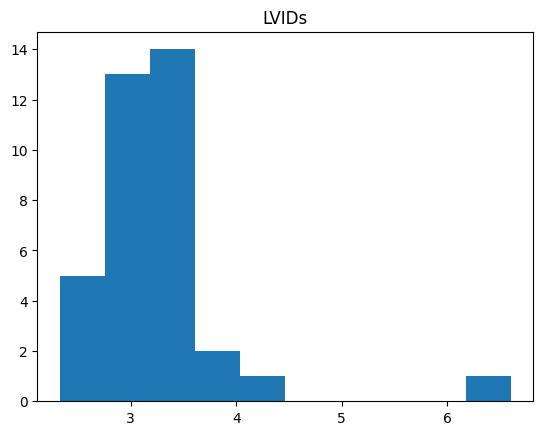

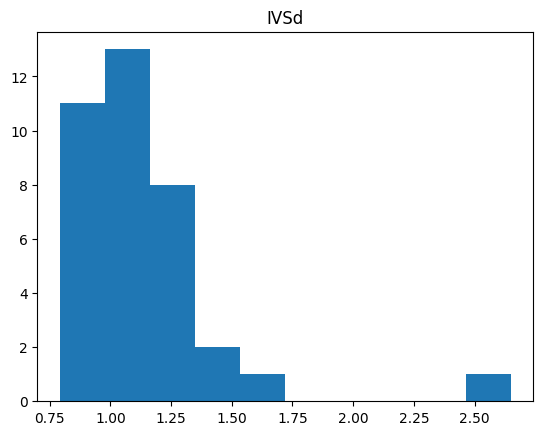

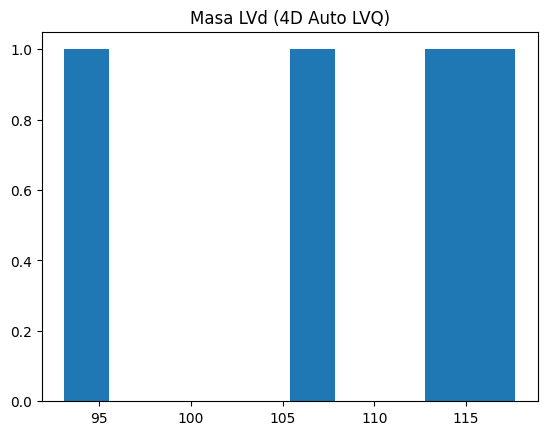

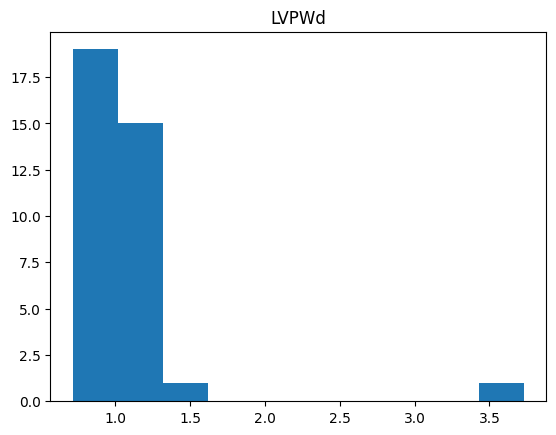

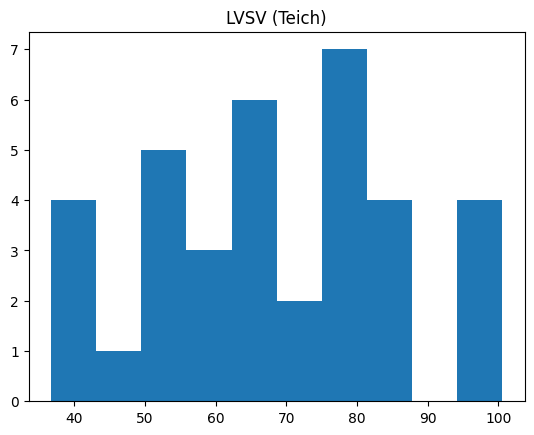

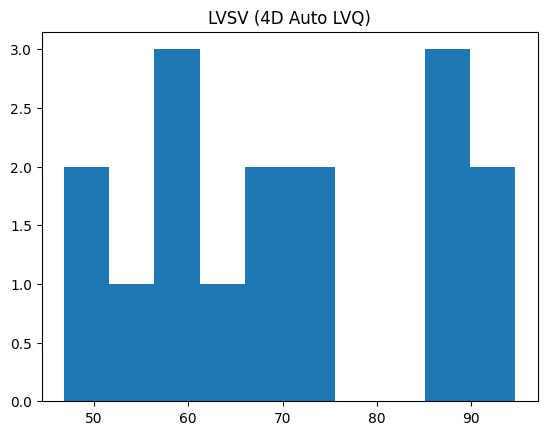

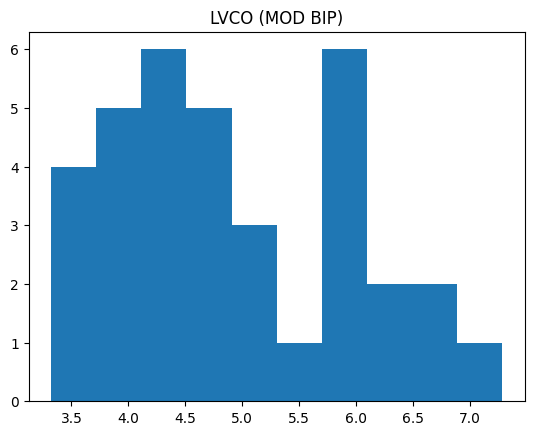

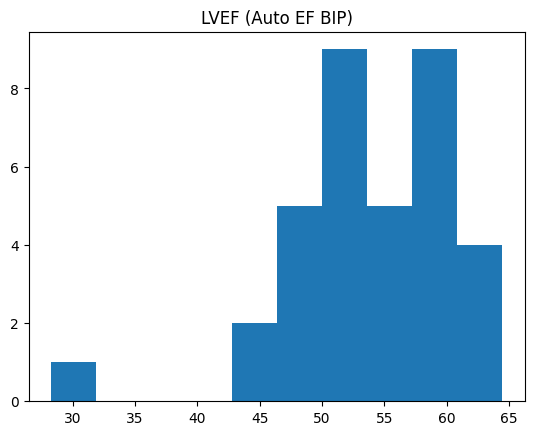

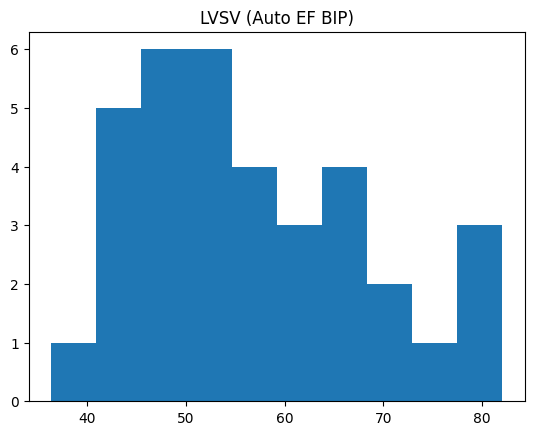

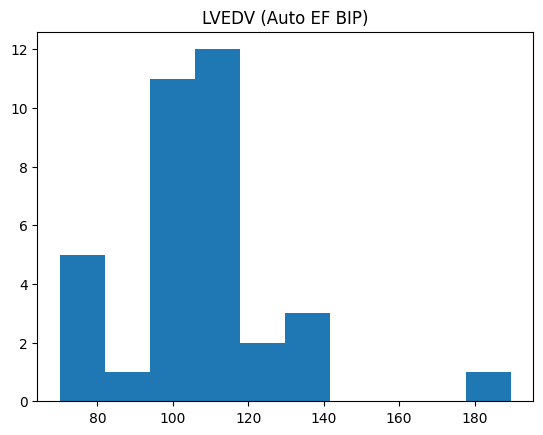

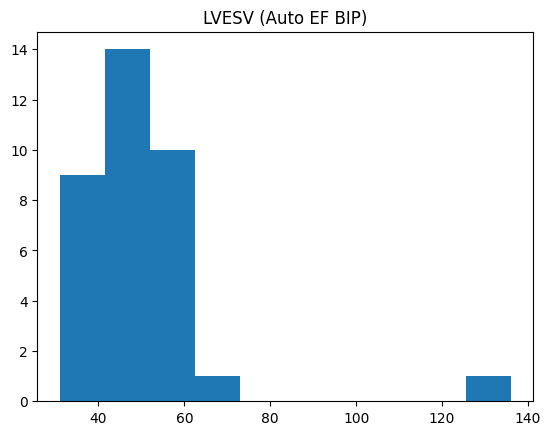

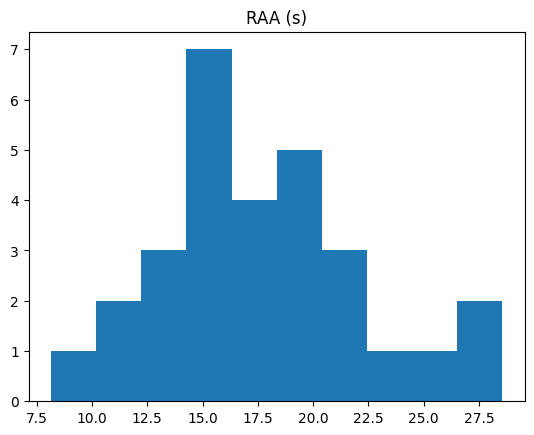

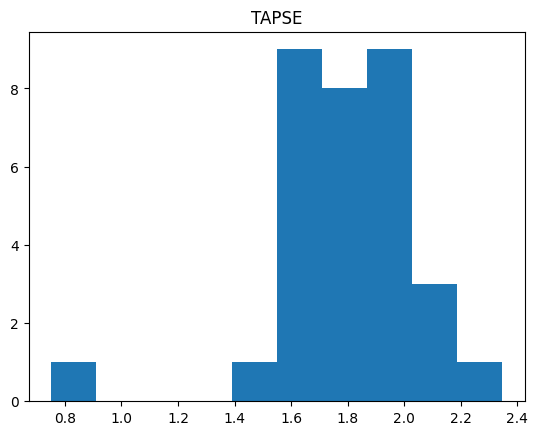

In [112]:
for value in rows:
    values = df[f'{value}'].dropna().tolist()
    plt.figure()
    plt.hist(values)
    plt.title(f'{value}')
    plt.show

In [113]:
for value in rows:
    df[value] = df[value].dropna()
print(df)

    nazwa pacjenta  GLPS (4D Auto LVQ)      IVSd LAESV (A-L BIP)  \
0   fMacL_012.xlsx          -13.316242  0.820337       48.012516   
1   fMilS_002.xlsx                 NaN  0.908217        62.94594   
2   fWawA_006.xlsx                 NaN  2.649397       73.051742   
3   fZimR_009.xlsx                 NaN  1.271071       75.167018   
4   mChoB_007.xlsx                 NaN      0.94           78.46   
5   mChrJ_001.xlsx                 NaN      1.01           97.46   
6   mDawD_012.xlsx                 NaN  1.109307       98.872708   
7   mDawM_005.xlsx                 NaN  1.082329       89.838876   
8   mDerK_000.xlsx                 NaN  1.027461       95.665425   
9   mFigP_002.xlsx                 NaN  1.000355       107.06531   
10  mGruG_009.xlsx                 NaN  1.296023       83.858002   
11  mHopJ_003.xlsx                 NaN      0.95           66.52   
12  mIliM_012.xlsx          -19.006154  1.037073       53.357463   
13  mKacA_003.xlsx                 NaN  1.189519

In [114]:
#autoskalowanie
for row in rows:
    for index, value in enumerate(df[row]):
        df[row][index] = (value - df[row].mean(skipna=True))/df[row].std(skipna=True)

C:\Users\lolak\AppData\Local\Temp\ipykernel_1192\117807346.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[row][index] = (value - df[row].mean(skipna=True))/df[row].std(skipna=True)
C:\Users\lolak\AppData\Local\Temp\ipykernel_1192\117

In [115]:
print(df)

    nazwa pacjenta  GLPS (4D Auto LVQ)      IVSd LAESV (A-L BIP)  \
0   fMacL_012.xlsx            0.293850 -0.992774        -0.96626   
1   fMilS_002.xlsx                 NaN -0.384122       -0.588874   
2   fWawA_006.xlsx                 NaN  2.955931       -0.328631   
3   fZimR_009.xlsx                 NaN  0.363485       -0.236514   
4   mChoB_007.xlsx                 NaN -0.173232       -0.129379   
5   mChrJ_001.xlsx                 NaN  0.001556        0.249932   
6   mDawD_012.xlsx                 NaN  0.202303        0.313835   
7   mDawM_005.xlsx                 NaN  0.195587        0.200517   
8   mDerK_000.xlsx                 NaN   0.14616         0.33276   
9   mFigP_002.xlsx                 NaN  0.139508        0.553119   
10  mGruG_009.xlsx                 NaN  0.605066        0.223474   
11  mHopJ_003.xlsx                 NaN  0.126898       -0.015163   
12  mIliM_012.xlsx           -0.828052  0.283925       -0.189421   
13  mKacA_003.xlsx                 NaN  0.530622

In [124]:
scaled_file = os.path.join(folder_path, 'output', 'skalowane_dane.xlsx')
with pd.ExcelWriter(scaled_file, engine='openpyxl') as writer:
    df[rows].to_excel(writer, index=True, sheet_name='out')

In [125]:
data = pd.read_excel(scaled_file)

In [126]:
cor_pearson = data[rows].corr(method='pearson')
pearson = os.path.join(folder_path, 'output', 'korelacje.xlsx')
with pd.ExcelWriter(pearson, engine='openpyxl') as writer:
    cor_pearson.to_excel(writer, index=True, sheet_name='pearson')


In [127]:
cor_kendall = data[rows].corr(method='kendall')
with pd.ExcelWriter('korelacje.xlsx', engine='openpyxl', mode='a') as writer:
    cor_kendall.to_excel(writer, sheet_name='kendall', index=False, header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'korelacje.xlsx'